Import Library

In [37]:
import os
import cv2
import numpy as np
from tabulate import tabulate
from skimage.feature import graycomatrix, graycoprops

Directory

In [38]:
image_directory_training="../Dataset/Raw/5_Label/DataSet_Training"
image_directory_testing="../Dataset/Raw/5_Label/DataSet_Testing"

Ekstraksi Fitur HSV

In [39]:
def ef_hsv_training(image_directory_training):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_training = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_training), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_training.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_training


def ef_hsv_testing(image_directory_testing):

   # membuat list untuk menyimpan hasil ekstraksi fitur
  features_testing = []

  # melakukan ekstraksi fitur pada setiap folder
  for a, (root, dirs, files) in enumerate(os.walk(image_directory_testing), start=0):

    # mengambil semua file gambar di dalam folder
    image_files = [f for f in files if f.endswith('.jpg')]

    # melakukan ekstraksi fitur pada setiap gambar
    for image_file in image_files:
      # membaca gambar
      image = cv2.imread(os.path.join(root, image_file))

      # mengubah gambar ke dalam format HSV
      hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

      # mengambil nilai hue (H) dari gambar
      hue = hsv[:, :, 0]

      # mengambil nilai saturation (S) dari gambar
      saturation = hsv[:, :, 1]

      # mengambil nilai value (V) dari gambar
      value = hsv[:, :, 2]

      # menambahkan nilai HSV ke dalam list
      features_testing.append(
          [np.mean(hue), np.mean(saturation), np.mean(value), a])

  return features_testing

Inisialisasi Data Training

In [40]:
train_data = ef_hsv_training(image_directory_training)

# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(train_data, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   Label |
+===========+==================+=============+=========+
|  17.0536  |          88.985  |     193.491 |       1 |
+-----------+------------------+-------------+---------+
|  17.0156  |          71.7499 |     197.16  |       1 |
+-----------+------------------+-------------+---------+
|  20.6153  |          88.8999 |     182.852 |       1 |
+-----------+------------------+-------------+---------+
|  20.6153  |          88.8999 |     182.852 |       1 |
+-----------+------------------+-------------+---------+
|  22.007   |          95.4959 |     178.511 |       1 |
+-----------+------------------+-------------+---------+
|  22.007   |          95.4959 |     178.511 |       1 |
+-----------+------------------+-------------+---------+
|  19.2327  |          89.2417 |     190.735 |       1 |
+-----------+------------------+-------------+---------+
|  19.2327  |          89.2417 

Inisialisasi Data Testing

In [41]:
test_data = ef_hsv_testing(image_directory_testing)

# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(test_data, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+---------+
|   Hue (H) |   Saturation (S) |   Value (V) |   Label |
+===========+==================+=============+=========+
|  18.647   |          91.9484 |     186.19  |       1 |
+-----------+------------------+-------------+---------+
|  22.2349  |          95.6997 |     177.898 |       1 |
+-----------+------------------+-------------+---------+
|  12.8061  |          61.7072 |     206.38  |       1 |
+-----------+------------------+-------------+---------+
|  14.3996  |          67.0447 |     202.3   |       1 |
+-----------+------------------+-------------+---------+
|  10.971   |          32.2049 |     220.682 |       2 |
+-----------+------------------+-------------+---------+
|   9.05928 |          57.1463 |     218.393 |       2 |
+-----------+------------------+-------------+---------+
|   9.42231 |          33.6177 |     219.731 |       2 |
+-----------+------------------+-------------+---------+
|   6.64559 |          47.5064 

Klasifikasi Model Naive Bayes

In [42]:
X_train = [data[:-1] for data in train_data]
y_train = [data[-1] for data in train_data ]

In [43]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [44]:
X_test = [data[:-1] for data in test_data]
y_true = [data[-1] for data in test_data]

In [45]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 4, 3, 3, 5, 3, 1])

In [46]:
# Menggabungkan data uji dan hasil prediksi
result_table = []
for data, pred in zip(test_data, y_pred):
    # Mengambil nilai fitur berdasarkan indeks
    feature_values = [data[i] for i in range(len(data))]
    result_row = feature_values + [pred]
    result_table.append(result_row)

# header tabel hsv
header = ["Hue (H)", "Saturation (S)", "Value (V)", "True Label","Predict Label"]

# Mencetak tabel menggunakan tabulate
print(tabulate(result_table, headers=header, tablefmt="grid"))

+-----------+------------------+-------------+--------------+-----------------+
|   Hue (H) |   Saturation (S) |   Value (V) |   True Label |   Predict Label |
+===========+==================+=============+==============+=================+
|  18.647   |          91.9484 |     186.19  |            1 |               1 |
+-----------+------------------+-------------+--------------+-----------------+
|  22.2349  |          95.6997 |     177.898 |            1 |               1 |
+-----------+------------------+-------------+--------------+-----------------+
|  12.8061  |          61.7072 |     206.38  |            1 |               3 |
+-----------+------------------+-------------+--------------+-----------------+
|  14.3996  |          67.0447 |     202.3   |            1 |               3 |
+-----------+------------------+-------------+--------------+-----------------+
|  10.971   |          32.2049 |     220.682 |            2 |               2 |
+-----------+------------------+--------

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.40      0.50      0.44         4
           2       1.00      1.00      1.00         4
           3       0.44      1.00      0.62         4
           4       1.00      0.25      0.40         4
           5       1.00      0.25      0.40         4

    accuracy                           0.60        20
   macro avg       0.77      0.60      0.57        20
weighted avg       0.77      0.60      0.57        20



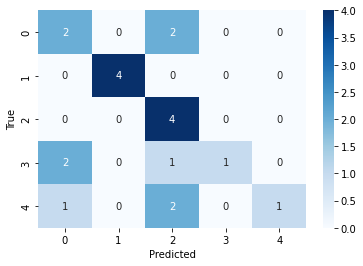

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# menghitung confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6
